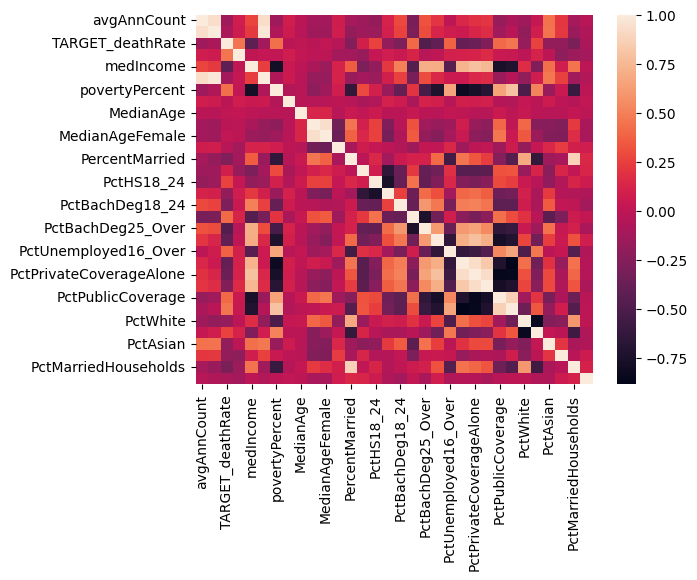

C:\Users\patwa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


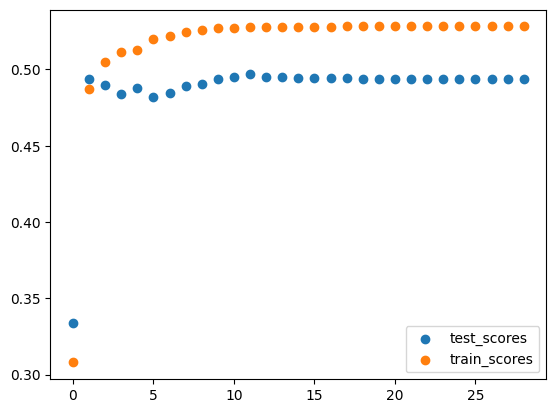

RMSE: 20.352483595241207
R-squared: 0.49376598885796263
Mean: 178.66406301279943


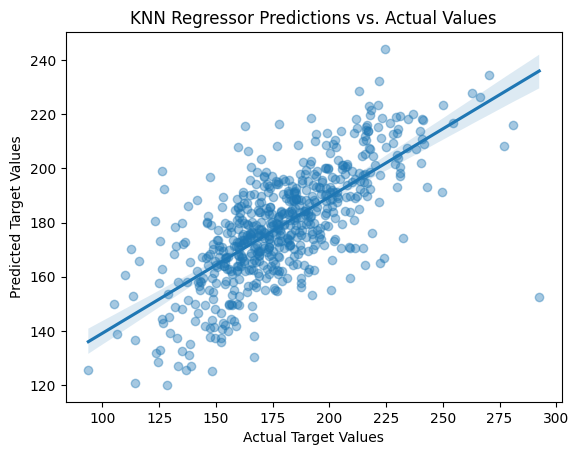

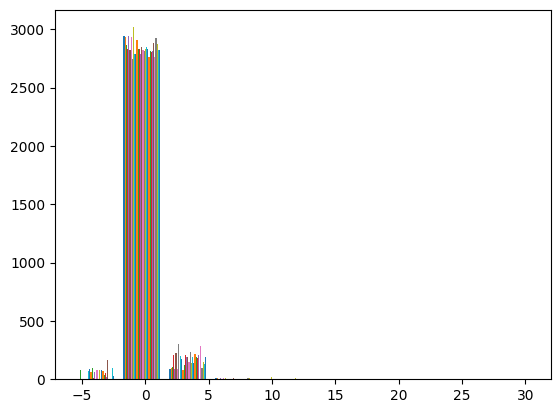

In [29]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize,scale
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset into a pandas DataFrame
df = pd.read_csv('cancer_reg (1).csv', encoding="latin1")

#Correlation Matirx
sns.heatmap(df.corr(),annot=False)
plt.show()

#Mean in Range data set
for i in range(len(df['binnedInc'])):
    orgVal  = df['binnedInc'][i]
    valsStr = orgVal[1:-1]
    vals      = valsStr.split(", ")
    newVal    = (float(vals[0]) + float(vals[1])) / 2 
    df['binnedInc'][i] = newVal

# Separate the target variable from the features
X = df.drop(['TARGET_deathRate',"Geography",'PctSomeCol18_24'], axis=1)
y = df['TARGET_deathRate']

# Impute NaN values using mean imputation
mean_value=X.mean()
X = X.fillna(value=mean_value, inplace=False)

# Scale the features
for column in X.keys():
    X[column] = (X[column] - X[column].mean()) / (X[column].std())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#########################################################################################
#Optimizing the PLS  vaule
test_scores_minmax = []
train_scores_minmax = []

for i in range(1, 30):
    pls1 = PLSRegression(n_components=i)
    pls1 = pls1.fit(X_train, y_train)
    test_score = pls1.score(X_test, y_test)
    train_score = pls1.score(X_train, y_train)
    
    test_scores_minmax.append(test_score)
    train_scores_minmax.append(train_score)
    
x = [i for i in range(0, len(test_scores_minmax))]
  
# plot lines the optimization
plt.scatter(x, test_scores_minmax, label = "test_scores")
plt.scatter(x, train_scores_minmax, label = "train_scores")
plt.legend()
plt.show()
#########################################################################################
# Initialize a PLS regression model with 3 components
pls = PLSRegression(n_components=2)

# Fit the PLS regression model to the training data
pls.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = pls.predict(X_test)
#########################################################################################
#Accuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('Mean:', np.mean(df['TARGET_deathRate']))

# Scatter plot 
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('KNN Regressor Predictions vs. Actual Values')
plt.show()

_ = plt.hist(X)